In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://archive.ics.uci.edu/static/public/849/data.csv")

# **1.Introducción**


**1. Breve presentación del problema de investigacion.**

¿Qué factores influyen en el consumo energético de las tres zonas de distribución de la ciudad de Tetuán?

**2. Contexto.**

El consumo energético es un indicador clave para comprender el comportamiento y las necesidades de una ciudad, ya que refleja tanto los patrones de uso de los habitantes como las condiciones ambientales que pueden influir en la demanda de electricidad. Analizar estos factores es relevante porque permite identificar patrones de consumo, optimizar la distribución de la energía y contribuir a una gestión más eficiente y sostenible del sistema eléctrico.

En el caso de la ciudad de Tetuán, en Marruecos, se cuenta con datos detallados sobre el consumo de energía en tres zonas de distribución, junto con variables climáticas como **temperatura**, **humedad** y **velocidad del viento**. Comprender cómo estas variables se relacionan con el consumo energético resulta fundamental para apoyar decisiones sobre planeación, mantenimiento y políticas de ahorro energético, especialmente en entornos urbanos donde la demanda de electricidad está en constante crecimiento.

**3. Relación entre el problema y la base de datos seleccionada.**

Para abordar esta pregunta, utilizamos el conjunto de datos Power Consumption of Tetouan City, que registra el consumo energético de tres zonas de distribución de la ciudad, junto con variables climáticas como temperatura, humedad y velocidad del viento. Gracias a esta información, es posible analizar cómo factores ambientales y temporales se relacionan con la demanda de electricidad, permitiendo identificar patrones de consumo útiles para la gestión y planificación del sistema energético.

# **2. Descripción de la base de datos**

In [4]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [5]:
# Número de registros y variables
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 52416
Número de variables: 9


In [6]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())


Tipos de datos por variable:
float64    8
object     1
Name: count, dtype: int64


In [7]:
# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))

🔹 Variables categóricas:
- DateTime

🔸 Variables numéricas:
- Temperature
- Humidity
- Wind Speed
- general diffuse flows
- diffuse flows
- Zone 1 Power Consumption
- Zone 2  Power Consumption
- Zone 3  Power Consumption


In [8]:
# Descripción general
print("\nDescripción de variables numéricas:")
print(df.describe())


Descripción de variables numéricas:
        Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                520

# **3. Análisis inicial de las variables**

In [9]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])


Conteo de valores faltantes por variable:
Series([], dtype: int64)


In [10]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
DateTime                     52416
Zone 2  Power Consumption    29621
Zone 1 Power Consumption     27709
Zone 3  Power Consumption    22838
general diffuse flows        10504
diffuse flows                10449
Humidity                      4443
Temperature                   3437
Wind Speed                     548
dtype: int64


In [11]:
variables_clave = ['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Temperature', 'Humidity', 'Wind Speed']
print("\nVista rápida de variables clave:")
print(df[variables_clave].head())
# Vista rápida de las variables clave
print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].describe())


Vista rápida de variables clave:
        DateTime  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0  1/1/2017 0:00               34055.69620                16128.87538   
1  1/1/2017 0:10               29814.68354                19375.07599   
2  1/1/2017 0:20               29128.10127                19006.68693   
3  1/1/2017 0:30               28228.86076                18361.09422   
4  1/1/2017 0:40               27335.69620                17872.34043   

   Zone 3  Power Consumption  Temperature  Humidity  Wind Speed  
0                20240.96386        6.559      73.8       0.083  
1                20131.08434        6.414      74.5       0.083  
2                19668.43373        6.313      74.5       0.080  
3                18899.27711        6.121      75.0       0.083  
4                18442.40964        5.921      75.7       0.081  

Estadísticas descriptivas de variables clave:
       Zone 1 Power Consumption  Zone 2  Power Consumption  \
count              524

#**4. Visualizaciones exploratorias básicas**

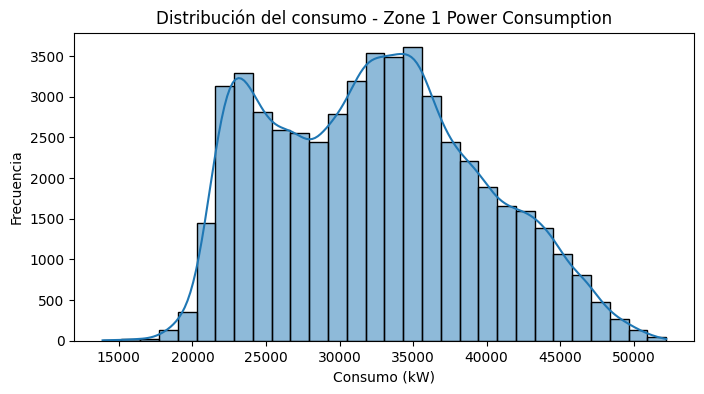

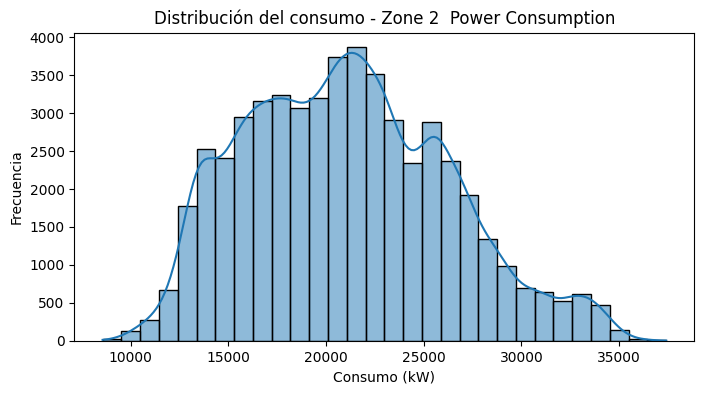

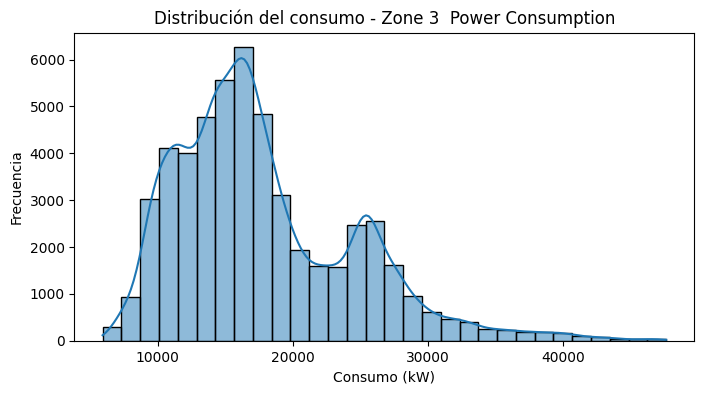

In [12]:
zones = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

for zone in zones:
    plt.figure(figsize=(8,4))
    sns.histplot(df[zone], bins=30, kde=True)
    plt.title(f"Distribución del consumo - {zone}")
    plt.xlabel("Consumo (kW)")
    plt.ylabel("Frecuencia")
    plt.show()

In [13]:
# Convertir DateTime a formato fecha
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Crear columnas adicionales para agrupar
df['hour'] = df['DateTime'].dt.hour
df['day'] = df['DateTime'].dt.day
df['month'] = df['DateTime'].dt.month
df['weekday'] = df['DateTime'].dt.day_name()


<Figure size 1000x500 with 0 Axes>

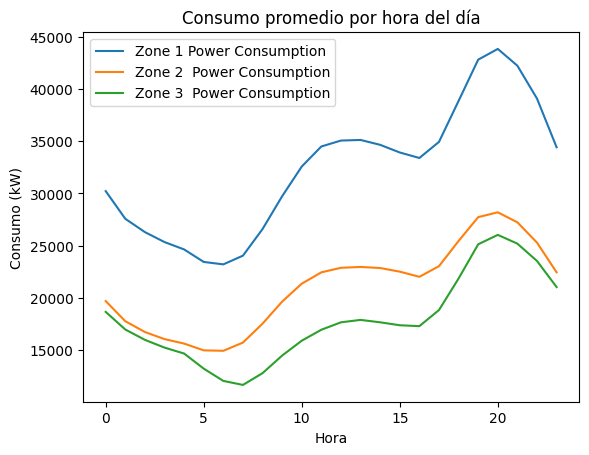

In [14]:
hourly_avg = df.groupby('hour')[zones].mean()

plt.figure(figsize=(10,5))
hourly_avg.plot()
plt.title("Consumo promedio por hora del día")
plt.xlabel("Hora")
plt.ylabel("Consumo (kW)")
plt.legend(zones)
plt.show()


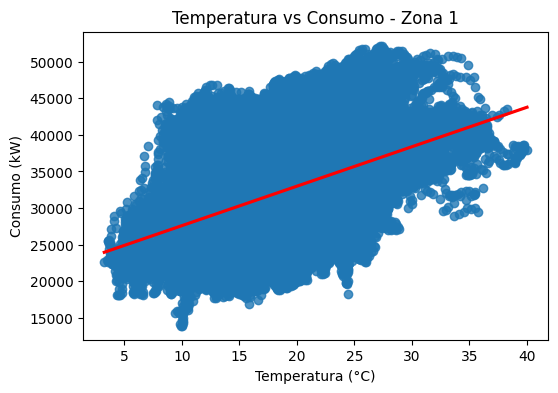

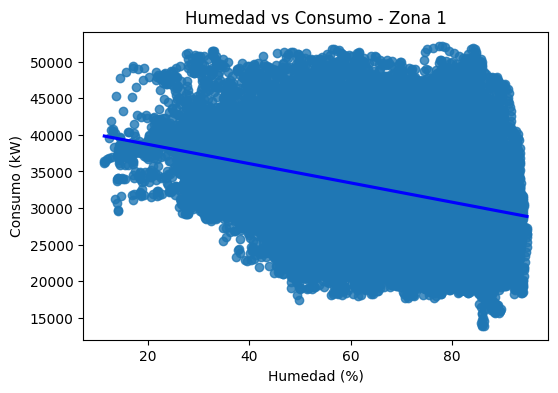

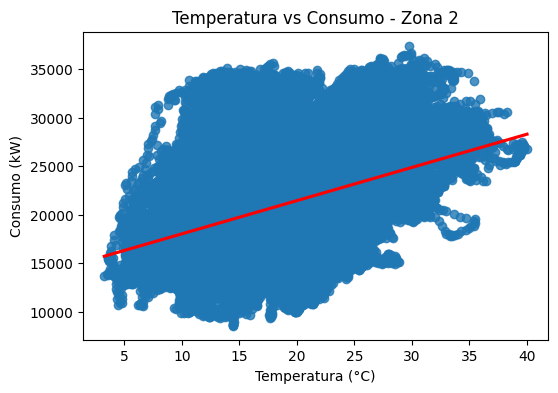

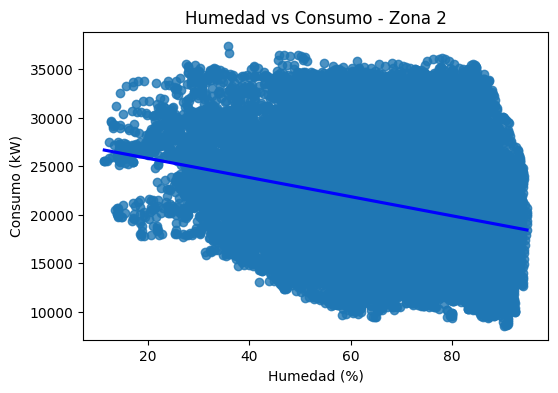

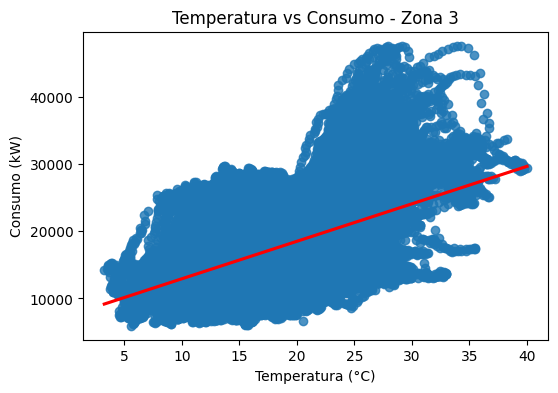

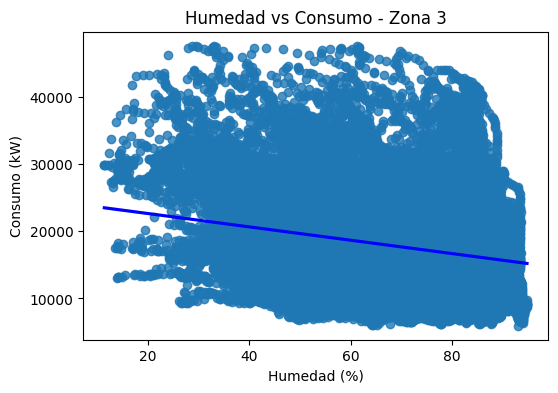

In [20]:
zones = [
    ('Zone 1 Power Consumption', 'Zona 1'),
    ('Zone 2  Power Consumption', 'Zona 2'),
    ('Zone 3  Power Consumption', 'Zona 3')
]

for zone, label in zones:
    # Consumo vs Temperatura
    plt.figure(figsize=(6,4))
    sns.regplot(data=df, x='Temperature', y=zone, line_kws={"color":"red"})
    plt.title(f"Temperatura vs Consumo - {label}")
    plt.xlabel("Temperatura (°C)")
    plt.ylabel("Consumo (kW)")
    plt.show()

    # Consumo vs Humedad
    plt.figure(figsize=(6,4))
    sns.regplot(data=df, x='Humidity', y=zone, line_kws={"color":"blue"})
    plt.title(f"Humedad vs Consumo - {label}")
    plt.xlabel("Humedad (%)")
    plt.ylabel("Consumo (kW)")
    plt.show()

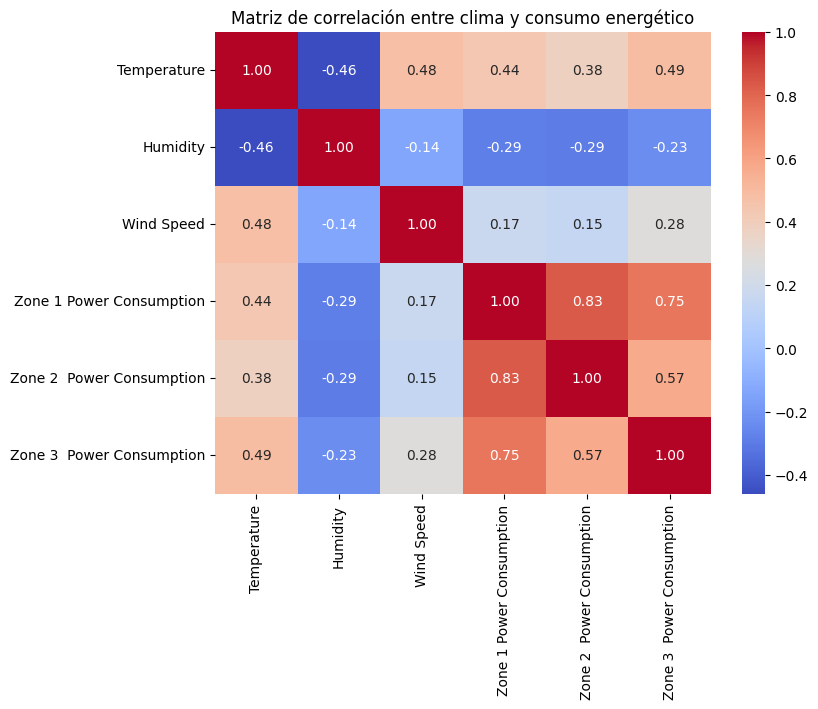

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo variables de interés
variables = [
    'Temperature', 'Humidity', 'Wind Speed',
    'Zone 1 Power Consumption',
    'Zone 2  Power Consumption',
    'Zone 3  Power Consumption'
]

plt.figure(figsize=(8,6))
sns.heatmap(df[variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre clima y consumo energético")
plt.show()

#**5. Interpretaciones iniciales**

**¿Qué tendencias o patrones básicos se observan?**


*   Las tres zonas muestran distribuciones diferentes. La Zona 1 presenta los valores más altos y mayor variabilidad, mientras que la Zona 3 tiene consumos generalmente más bajos. Esto sugiere que las zonas tienen perfiles de demanda distintos.

*  El consumo energético es más bajo en la madrugada y aumenta de forma progresiva, alcanzando picos en la tarde-noche. Este patrón se repite en las tres zonas, aunque con magnitudes diferentes.

* Temperatura: Existe una correlación positiva moderada entre temperatura y consumo (0.38 a 0.49). A mayor temperatura, mayor consumo, probablemente por el uso de sistemas de climatización.

* Se observa una correlación negativa débil a moderada (–0.23 a –0.29), lo que indica que en condiciones más secas podría aumentar el consumo, aunque este efecto es menos pronunciado.

* Velocidad del viento: Presenta correlaciones débiles, lo que sugiere menor impacto directo en el consumo.




**¿Qué limitaciones tiene la base de datos?**


*  No se incluyen variables adicionales como tipo de actividad en cada zona o eventos externos (festivos, apagones, etc.) que podrían influir en el consumo.

* La base solo muestra lo que ocurre, pero no explica las causas

* Los datos de clima no están desglosados por zona, lo que puede limitar la precisión del análisis.



**¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?**


*   El consumo energético aumenta significativamente en días más calurosos, independientemente de la zona.
*   La humedad tiene un efecto inverso en el consumo, pero su impacto es más débil que el de la temperatura.




#**6. Conclusiones**




*   El análisis muestra que cada zona tiene un comportamiento de consumo diferente: la Zona 1 registra los consumos más altos y variables, mientras que la Zona 3 mantiene niveles más bajos. También se identificó un patrón diario repetitivo: el consumo es más bajo en la madrugada y aumenta progresivamente hasta alcanzar picos en la tarde-noche.
Además, se observó que la temperatura influye de manera clara en el consumo, a mayor calor, mayor uso de energía, probablemente por sistemas de climatización, mientras que la humedad y el viento parecen tener un impacto más débil o indirecto.
*   Este entregable ofrece una visión inicial valiosa sobre el comportamiento del consumo energético en las zonas analizadas. Aunque los datos actuales tienen limitaciones, como la falta de variables adicionales o datos climáticos más detallados, los hallazgos permiten plantear hipótesis más precisas y orientar los próximos análisis para comprender mejor qué factores explican las diferencias entre zonas y cómo optimizar el uso de energía.




# **7. Referencias**

**Dataset:** [Power Consumption of Tetouan City](https://archive.ics.uci.edu/dataset/849/power+consumption+of+tetouan+city)

**Autores:** Abdulwahed Salam, Abdelaaziz El Hibaoui

**Descripción:** Datos de consumo de energía de tres redes de distribución diferentes de la ciudad Tetuán, Marruecos